In [158]:
import pandas as pd
import matplotlib.pyplot as plt
#allows me to make the nice chart in output
from IPython.display import display
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from shapely.geometry import Polygon, MultiPolygon, Point
import numpy as np
#data is in DatafourtoFive
#coordinates = [Point(xy) for xy in zip (DataFourtoFive['x.pos.asec'],DataFourtoFive['y.pos.asec'])]
df = pd.read_csv("/Users/joshuahernandez/Documents/GitHub/HeliosProjectDS/Solar_flare_RHESSI_2004_05.csv")
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['x.pos.asec'],df['y.pos.asec']))

gdf.loc[gdf['year'] == 2005, 'month'] +=12
#cgatgpt
# Set the batch parameters
batchMaxSize = 4
overlap = 2

# Get the maximum value of the 'month' column in your GeoDataFrame
max_month = gdf['month'].max()

# Create an array to store the batches of GeoDataFrames
geodataframes = []



# Go through the data and create batches
for start_month in range(1, max_month - batchMaxSize + 2, batchMaxSize - overlap):
    end_month = start_month + batchMaxSize - 1
    # Create a batch within the specified 'start_month' and 'end_month' range
    batch = gdf[(gdf['month'] >= start_month) & (gdf['month'] <= end_month)]
    geodataframes.append(batch)

# Displaying all GeoDataFrames to ensure they work
for idx, batch in enumerate(geodataframes):
    display(batch)


print(len(geodataframes))

,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,flag.5,dt.start,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f,geometry
0,196,592,644352.0,6-12,-966,-207,988,536,A0,DR,...,Q2,2004-01-01 00:39:36,2004-01-01 00:40:06,2004-01-01 00:42:52,2004,1,1,6,12,POINT (-966.000 -207.000)
1,588,592,1838208.0,6-12,-967,-200,987,536,A0,DR,...,NaN,2004-01-01 00:42:52,2004-01-01 00:43:34,2004-01-01 00:52:40,2004,1,1,6,12,POINT (-967.000 -200.000)
2,712,1456,2815104.0,12-25,964,172,979,528,A0,P1,...,NaN,2004-01-01 01:06:56,2004-01-01 01:14:26,2004-01-01 01:18:48,2004,1,1,12,25,POINT (964.000 172.000)
3,1096,3824,12128496.0,12-25,-972,-137,982,0,A0,DR,...,Q2,2004-01-01 01:18:48,2004-01-01 01:29:22,2004-01-01 01:37:04,2004,1,1,12,25,POINT (-972.000 -137.000)
4,452,200,476352.0,6-12,-978,-249,1009,536,A0,DR,...,PE Q3,2004-01-01 02:21:20,2004-01-01 02:21:34,2004-01-01 02:28:52,2004,1,1,6,12,POINT (-978.000 -249.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,656,26,68832.0,6-12,533,365,646,0,A0,DF,...,NaN,2004-04-30 11:07:08,2004-04-30 11:12:18,2004-04-30 11:18:04,2004,4,30,6,12,POINT (533.000 365.000)
3658,292,52,32520.0,6-12,681,-179,704,0,A0,DF,...,Q2,2004-04-30 13:32:12,2004-04-30 13:32:42,2004-04-30 13:37:04,2004,4,30,6,12,POINT (681.000 -179.000)
3659,116,16,7248.0,6-12,680,-191,707,602,A0,DF,...,NaN,2004-04-30 15:50:32,2004-04-30 15:51:14,2004-04-30 15:52:28,2004,4,30,6,12,POINT (680.000 -191.000)
3660,244,32,24552.0,6-12,696,-193,722,602,A0,P1,...,NaN,2004-04-30 17:36:08,2004-04-30 17:37:38,2004-04-30 17:40:12,2004,4,30,6,12,POINT (696.000 -193.000)


,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,flag.5,dt.start,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f,geometry
2003,668,14,31647.0,6-12,-45,-918,919,0,A0,P1,...,NaN,2004-03-01 00:18:36,2004-03-01 00:23:50,2004-03-01 00:29:44,2004,3,1,6,12,POINT (-45.000 -918.000)
2004,1208,28,98721.0,6-12,-373,-115,390,567,A0,DR,...,Q2,2004-03-01 00:42:04,2004-03-01 00:48:42,2004-03-01 01:02:12,2004,3,1,6,12,POINT (-373.000 -115.000)
2005,244,48,28080.0,6-12,890,286,935,564,A0,P1,...,NaN,2004-03-01 02:09:56,2004-03-01 02:10:38,2004-03-01 02:14:00,2004,3,1,6,12,POINT (890.000 286.000)
2006,116,52,15456.0,6-12,888,286,933,564,A0,P1,...,NaN,2004-03-01 02:36:00,2004-03-01 02:37:26,2004-03-01 02:37:56,2004,3,1,6,12,POINT (888.000 286.000)
2007,104,24,10848.0,6-12,895,270,935,564,A0,P1,...,NaN,2004-03-01 04:59:20,2004-03-01 04:59:54,2004-03-01 05:01:04,2004,3,1,6,12,POINT (895.000 270.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,64,16,5112.0,6-12,-679,-167,700,640,A0,P1,...,NaN,2004-06-29 20:28:16,2004-06-29 20:28:42,2004-06-29 20:29:20,2004,6,29,6,12,POINT (-679.000 -167.000)
4983,96,15,7368.0,6-12,-671,-151,688,640,A0,P1,...,NaN,2004-06-29 20:33:16,2004-06-29 20:33:50,2004-06-29 20:34:52,2004,6,29,6,12,POINT (-671.000 -151.000)
4984,176,20,17184.0,6-12,-619,-208,653,640,A0,P1,...,NaN,2004-06-30 01:30:20,2004-06-30 01:31:02,2004-06-30 01:33:16,2004,6,30,6,12,POINT (-619.000 -208.000)
4985,736,2416,3126960.0,12-25,-534,-216,576,640,A0,DR,...,SE,2004-06-30 14:25:28,2004-06-30 14:34:18,2004-06-30 14:37:44,2004,6,30,12,25,POINT (-534.000 -216.000)


,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,flag.5,dt.start,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f,geometry
3662,148,20,13008.0,6-12,397,-117,414,603,A0,P1,...,NaN,2004-05-01 01:36:36,2004-05-01 01:37:34,2004-05-01 01:39:04,2004,5,1,6,12,POINT (397.000 -117.000)
3663,1504,1904,7411104.0,12-25,410,-116,426,601,A0,P1,...,NaN,2004-05-01 04:32:32,2004-05-01 04:43:50,2004-05-01 04:57:36,2004,5,1,12,25,POINT (410.000 -116.000)
3664,336,96,87480.0,6-12,442,-136,463,603,A0,P1,...,NaN,2004-05-01 05:47:04,2004-05-01 05:49:58,2004-05-01 05:52:40,2004,5,1,6,12,POINT (442.000 -136.000)
3665,204,134,70464.0,6-12,415,-119,432,601,A0,DF,...,NaN,2004-05-01 06:07:28,2004-05-01 06:08:14,2004-05-01 06:10:52,2004,5,1,6,12,POINT (415.000 -119.000)
3666,180,54,26650.0,6-12,415,-122,433,601,A0,DF,...,NaN,2004-05-01 06:11:52,2004-05-01 06:12:46,2004-05-01 06:14:52,2004,5,1,6,12,POINT (415.000 -122.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,120,44,25440.0,6-12,941,105,947,663,A0,DR,...,NaN,2004-08-31 13:37:16,2004-08-31 13:39:02,2004-08-31 13:39:16,2004,8,31,6,12,POINT (941.000 105.000)
7054,460,46,54456.0,6-12,970,62,972,663,A0,DR,...,Q2,2004-08-31 14:18:04,2004-08-31 14:18:38,2004-08-31 14:25:44,2004,8,31,6,12,POINT (970.000 62.000)
7055,440,34,56712.0,6-12,-943,-176,960,0,A0,DR,...,NaN,2004-08-31 16:03:00,2004-08-31 16:06:18,2004-08-31 16:10:20,2004,8,31,6,12,POINT (-943.000 -176.000)
7056,200,32,27168.0,6-12,971,78,974,663,A0,P1,...,NaN,2004-08-31 19:47:04,2004-08-31 19:50:14,2004-08-31 19:50:24,2004,8,31,6,12,POINT (971.000 78.000)


,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,flag.5,dt.start,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f,geometry
4987,192,28,25680.0,6-12,-347,-232,418,0,A0,DR,...,Q2,2004-07-01 14:18:16,2004-07-01 14:19:46,2004-07-01 14:21:28,2004,7,1,6,12,POINT (-347.000 -232.000)
4988,292,656,546888.0,12-25,-404,102,417,0,A0,GE,...,NaN,2004-07-01 14:31:04,2004-07-01 14:33:50,2004-07-01 14:35:56,2004,7,1,12,25,POINT (-404.000 102.000)
4989,212,26,20928.0,6-12,-270,99,288,639,A0,DF,...,Q2,2004-07-02 06:45:08,2004-07-02 06:46:38,2004-07-02 06:48:40,2004,7,2,6,12,POINT (-270.000 99.000)
4990,408,400,257472.0,6-12,-96,-234,253,0,A0,P1,...,NaN,2004-07-02 17:42:48,2004-07-02 17:46:06,2004-07-02 17:49:36,2004,7,2,6,12,POINT (-96.000 -234.000)
4991,172,26,16560.0,6-12,-56,102,116,639,A0,P1,...,NaN,2004-07-03 04:38:32,2004-07-03 04:39:38,2004-07-03 04:41:24,2004,7,3,6,12,POINT (-56.000 102.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8659,2152,624,1911050.0,25-50,653,148,669,691,a0,A1,...,P1 Q2,2004-10-31 21:18:20,2004-10-31 21:25:02,2004-10-31 21:54:12,2004,10,31,25,50,POINT (653.000 148.000)
8660,376,26,46224.0,6-12,680,136,693,691,A0,DF,...,Q2,2004-10-31 22:56:00,2004-10-31 22:59:42,2004-10-31 23:02:16,2004,10,31,6,12,POINT (680.000 136.000)
8661,176,68,37824.0,6-12,-317,-299,436,693,A0,DF,...,NaN,2004-10-31 23:06:00,2004-10-31 23:07:42,2004-10-31 23:08:56,2004,10,31,6,12,POINT (-317.000 -299.000)
8662,80,52,15168.0,6-12,-318,-299,437,693,A0,DF,...,NaN,2004-10-31 23:09:20,2004-10-31 23:09:50,2004-10-31 23:10:40,2004,10,31,6,12,POINT (-318.000 -299.000)


,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,flag.5,dt.start,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f,geometry
7058,412,128,122976.0,6-12,-662,696,961,0,A0,P1,...,NaN,2004-09-01 00:00:40,2004-09-01 00:03:22,2004-09-01 00:07:32,2004,9,1,6,12,POINT (-662.000 696.000)
7059,572,26,56352.0,6-12,975,79,978,663,A0,P1,...,NaN,2004-09-01 01:30:12,2004-09-01 01:31:14,2004-09-01 01:39:44,2004,9,1,6,12,POINT (975.000 79.000)
7060,116,16,9168.0,6-12,950,63,952,663,A0,P1,...,NaN,2004-09-01 02:29:20,2004-09-01 02:30:18,2004-09-01 02:31:16,2004,9,1,6,12,POINT (950.000 63.000)
7061,1104,88,208008.0,6-12,966,91,971,663,A0,ES,...,NaN,2004-09-01 03:06:04,2004-09-01 03:07:22,2004-09-01 03:24:28,2004,9,1,6,12,POINT (966.000 91.000)
7062,208,24,24816.0,6-12,615,-772,987,0,A0,P1,...,NaN,2004-09-01 03:24:28,2004-09-01 03:26:06,2004-09-01 03:27:56,2004,9,1,6,12,POINT (615.000 -772.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,160,72,37800.0,12-25,-551,115,563,0,A0,DF,...,Q2,2004-12-31 22:22:40,2004-12-31 22:23:30,2004-12-31 22:25:20,2004,12,31,12,25,POINT (-551.000 115.000)
10196,292,64,49440.0,6-12,-558,115,569,0,A0,DF,...,Q2,2004-12-31 22:25:20,2004-12-31 22:26:34,2004-12-31 22:30:12,2004,12,31,6,12,POINT (-558.000 115.000)
10197,728,32,58416.0,6-12,-550,135,567,715,A0,DF,...,Q2,2004-12-31 22:30:12,2004-12-31 22:33:30,2004-12-31 22:42:20,2004,12,31,6,12,POINT (-550.000 135.000)
10198,316,152,104856.0,6-12,-557,123,570,715,A0,DF,...,Q2,2004-12-31 22:46:16,2004-12-31 22:48:50,2004-12-31 22:51:32,2004,12,31,6,12,POINT (-557.000 123.000)


,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,flag.5,dt.start,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f,geometry
8664,1096,232,477960.0,6-12,691,153,707,691,A0,DF,...,Q2,2004-11-01 00:05:52,2004-11-01 00:14:58,2004-11-01 00:24:08,2004,11,1,6,12,POINT (691.000 153.000)
8665,232,16,17472.0,6-12,692,156,709,691,A0,DF,...,Q2,2004-11-01 00:24:08,2004-11-01 00:24:46,2004-11-01 00:28:00,2004,11,1,6,12,POINT (692.000 156.000)
8666,296,26,18456.0,6-12,922,233,951,687,A0,DF,...,Q2,2004-11-01 00:28:00,2004-11-01 00:29:38,2004-11-01 00:32:56,2004,11,1,6,12,POINT (922.000 233.000)
8667,468,480,304152.0,12-25,688,178,711,691,A0,DF,...,Q2,2004-11-01 00:33:56,2004-11-01 00:38:06,2004-11-01 00:41:44,2004,11,1,12,25,POINT (688.000 178.000)
8668,508,26,38784.0,6-12,929,222,955,687,A0,DF,...,NaN,2004-11-01 00:50:56,2004-11-01 00:54:50,2004-11-01 00:59:24,2004,11,1,6,12,POINT (929.000 222.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,160,18,14952.0,6-12,538,-66,542,737,A0,DF,...,PE Q3,2005-02-24 00:32:48,2005-02-24 00:33:50,2005-02-24 00:35:28,2005,14,24,6,12,POINT (538.000 -66.000)
11677,448,52,74472.0,6-12,821,-526,975,0,A0,P1,...,NaN,2005-02-24 04:59:04,2005-02-24 05:02:10,2005-02-24 05:06:32,2005,14,24,6,12,POINT (821.000 -526.000)
11678,664,30,64368.0,6-12,946,227,973,736,A0,DR,...,NaN,2005-02-24 14:05:20,2005-02-24 14:06:22,2005-02-24 14:16:24,2005,14,24,6,12,POINT (946.000 227.000)
11679,448,28,47184.0,6-12,947,234,975,736,A0,DF,...,Q2,2005-02-24 16:15:48,2005-02-24 16:18:10,2005-02-24 16:23:16,2005,14,24,6,12,POINT (947.000 234.000)


,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,flag.5,dt.start,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f,geometry
10200,976,2032,4462320.0,25-50,-544,99,553,715,A0,DF,...,Q2,2005-01-01 00:02:12,2005-01-01 00:11:10,2005-01-01 00:18:28,2005,13,1,25,50,POINT (-544.000 99.000)
10201,272,1456,1032576.0,12-25,-545,107,556,715,A0,DF,...,Q2,2005-01-01 00:18:28,2005-01-01 00:22:54,2005-01-01 00:23:00,2005,13,1,12,25,POINT (-545.000 107.000)
10202,1968,14274,40169152.0,100-300,0,0,0,715,a0,a1,...,DR EE P1 PE Q4,2005-01-01 00:24:20,2005-01-01 00:30:30,2005-01-01 00:57:08,2005,13,1,100,300,POINT (0.000 0.000)
10203,1816,458,1629977.0,12-25,-526,137,543,715,a0,A1,...,GS P1 Q3,2005-01-01 01:38:32,2005-01-01 01:39:10,2005-01-01 02:08:48,2005,13,1,12,25,POINT (-526.000 137.000)
10204,1904,42,317136.0,6-12,-528,136,545,715,A0,DF,...,P1 Q3,2005-01-01 03:20:24,2005-01-01 03:20:30,2005-01-01 03:52:08,2005,13,1,6,12,POINT (-528.000 136.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12654,120,26,14976.0,6-12,-47,-97,108,756,A0,DR,...,NaN,2005-04-30 20:42:32,2005-04-30 20:42:50,2005-04-30 20:44:32,2005,16,30,6,12,POINT (-47.000 -97.000)
12655,560,1264,1056672.0,12-25,-55,-93,108,756,A0,DR,...,NaN,2005-04-30 21:52:12,2005-04-30 21:54:30,2005-04-30 22:01:32,2005,16,30,12,25,POINT (-55.000 -93.000)
12656,724,32,76776.0,6-12,-945,-98,950,0,A0,P1,...,NaN,2005-04-30 23:09:48,2005-04-30 23:16:14,2005-04-30 23:21:52,2005,16,30,6,12,POINT (-945.000 -98.000)
12657,296,84,56112.0,6-12,-32,-95,100,756,A0,P1,...,NaN,2005-04-30 23:32:32,2005-04-30 23:34:22,2005-04-30 23:37:28,2005,16,30,6,12,POINT (-32.000 -95.000)


,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,flag.5,dt.start,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f,geometry
11681,928,320,576024.0,12-25,-926,245,958,741,A0,P1,...,NaN,2005-03-04 13:06:24,2005-03-04 13:12:18,2005-03-04 13:21:52,2005,15,4,12,25,POINT (-926.000 245.000)
11682,60,24,5976.0,6-12,-831,278,877,741,A0,DR,...,NaN,2005-03-05 18:49:08,2005-03-05 18:49:34,2005-03-05 18:50:08,2005,15,5,6,12,POINT (-831.000 278.000)
11683,216,22,17976.0,6-12,-835,291,885,741,A0,DR,...,NaN,2005-03-05 20:47:08,2005-03-05 20:48:06,2005-03-05 20:50:44,2005,15,5,6,12,POINT (-835.000 291.000)
11684,352,208,226560.0,12-25,-802,275,848,741,A0,DR,...,NaN,2005-03-06 01:14:44,2005-03-06 01:17:46,2005-03-06 01:20:36,2005,15,6,12,25,POINT (-802.000 275.000)
11685,464,40,63120.0,6-12,-788,306,845,741,A0,P1,...,NaN,2005-03-06 06:30:12,2005-03-06 06:32:18,2005-03-06 06:37:56,2005,15,6,6,12,POINT (-788.000 306.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13742,284,184,103704.0,12-25,-719,-58,721,0,A0,DF,...,Q2,2005-06-30 21:12:24,2005-06-30 21:13:30,2005-06-30 21:17:08,2005,18,30,12,25,POINT (-719.000 -58.000)
13743,552,624,487056.0,12-25,-709,-61,712,783,A0,DF,...,Q2,2005-06-30 21:23:12,2005-06-30 21:26:34,2005-06-30 21:32:24,2005,18,30,12,25,POINT (-709.000 -61.000)
13744,208,24,23520.0,6-12,-727,-51,728,783,A0,DF,...,NaN,2005-06-30 21:32:24,2005-06-30 21:33:26,2005-06-30 21:35:52,2005,18,30,6,12,POINT (-727.000 -51.000)
13745,72,72,14688.0,6-12,-713,-58,716,783,A0,DF,...,Q2,2005-06-30 21:41:04,2005-06-30 21:42:10,2005-06-30 21:42:16,2005,18,30,6,12,POINT (-713.000 -58.000)


,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,flag.5,dt.start,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f,geometry
12659,164,48,23520.0,6-12,423,-50,426,757,A0,P1,...,NaN,2005-05-01 00:03:48,2005-05-01 00:04:26,2005-05-01 00:06:32,2005,17,1,6,12,POINT (423.000 -50.000)
12660,376,84,71448.0,6-12,-22,-83,86,756,A0,ES,...,NaN,2005-05-01 00:45:12,2005-05-01 00:45:54,2005-05-01 00:51:28,2005,17,1,6,12,POINT (-22.000 -83.000)
12661,1700,2032,5664641.0,12-25,421,-45,424,757,A0,DF,...,Q2,2005-05-01 01:01:28,2005-05-01 01:15:06,2005-05-01 01:29:48,2005,17,1,12,25,POINT (421.000 -45.000)
12662,364,64,88681.0,6-12,429,-48,431,757,A0,DF,...,Q2,2005-05-01 01:29:48,2005-05-01 01:31:46,2005-05-01 01:35:52,2005,17,1,6,12,POINT (429.000 -48.000)
12663,104,30,15120.0,6-12,-964,-175,980,758,A0,P1,...,NaN,2005-05-01 02:25:52,2005-05-01 02:26:50,2005-05-01 02:27:36,2005,17,1,6,12,POINT (-964.000 -175.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15537,352,200,42124.0,6-12,233,109,257,803,a0,A1,...,P1 PE Q3,2005-08-31 12:03:32,2005-08-31 12:08:06,2005-08-31 12:09:24,2005,20,31,6,12,POINT (233.000 109.000)
15538,1412,176,152760.0,6-12,242,119,270,803,a0,A1,...,PE Q3 SE,2005-08-31 12:09:24,2005-08-31 12:11:30,2005-08-31 12:32:56,2005,20,31,6,12,POINT (242.000 119.000)
15539,592,3,9959.0,6-12,258,127,288,0,A0,DF,...,P1 PE Q4,2005-08-31 12:53:16,2005-08-31 12:53:46,2005-08-31 13:03:08,2005,20,31,6,12,POINT (258.000 127.000)
15540,236,15,17815.0,6-12,278,143,313,0,A0,P1,...,NaN,2005-08-31 14:02:24,2005-08-31 14:04:50,2005-08-31 14:06:20,2005,20,31,6,12,POINT (278.000 143.000)


,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,flag.5,dt.start,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f,geometry
13747,188,5,2075.0,6-12,-922,208,946,786,A0,DF,...,NaN,2005-07-01 04:53:40,2005-07-01 04:55:06,2005-07-01 04:56:48,2005,19,1,6,12,POINT (-922.000 208.000)
13748,1676,112,234449.0,25-50,-927,205,949,786,a0,A1,...,Q1,2005-07-01 04:56:48,2005-07-01 05:01:34,2005-07-01 05:24:44,2005,19,1,25,50,POINT (-927.000 205.000)
13749,1048,35,54343.0,6-12,-663,-69,667,783,A0,a1,...,EE P1 Q3,2005-07-01 05:35:44,2005-07-01 05:45:26,2005-07-01 05:53:12,2005,19,1,6,12,POINT (-663.000 -69.000)
13750,448,48,61776.0,6-12,164,-297,339,782,A0,DF,...,Q2,2005-07-01 06:33:48,2005-07-01 06:35:26,2005-07-01 06:41:16,2005,19,1,6,12,POINT (164.000 -297.000)
13751,372,18,29016.0,6-12,139,-300,331,782,A0,DF,...,NaN,2005-07-01 06:41:16,2005-07-01 06:42:30,2005-07-01 06:47:28,2005,19,1,6,12,POINT (139.000 -300.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16448,652,52,73584.0,6-12,359,-203,413,0,A0,DF,...,Q2,2005-10-12 12:17:20,2005-10-12 12:20:10,2005-10-12 12:28:12,2005,22,12,6,12,POINT (359.000 -203.000)
16449,608,384,518422.0,6-12,393,-215,449,0,A0,DF,...,PE Q3,2005-10-12 18:06:16,2005-10-12 18:12:18,2005-10-12 18:16:24,2005,22,12,6,12,POINT (393.000 -215.000)
16450,464,176,213192.0,6-12,408,-211,460,0,A0,DR,...,Q2,2005-10-12 18:16:24,2005-10-12 18:18:42,2005-10-12 18:24:08,2005,22,12,6,12,POINT (408.000 -211.000)
16451,324,76,55104.0,6-12,518,-195,554,0,A0,DF,...,NaN,2005-10-13 09:03:08,2005-10-13 09:05:18,2005-10-13 09:08:32,2005,22,13,6,12,POINT (518.000 -195.000)


,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,flag.5,dt.start,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f,geometry
15542,2736,112,863496.0,6-12,-218,-332,397,806,A0,DR,...,NaN,2005-09-01 23:13:28,2005-09-01 23:17:42,2005-09-01 23:59:04,2005,21,1,6,12,POINT (-218.000 -332.000)
15543,736,136,225888.0,6-12,597,108,606,0,A0,DR,...,Q2,2005-09-02 13:38:00,2005-09-02 13:39:42,2005-09-02 13:50:16,2005,21,2,6,12,POINT (597.000 108.000)
15544,1076,192,396312.0,12-25,631,113,641,0,A0,P1,...,NaN,2005-09-02 20:17:36,2005-09-02 20:20:50,2005-09-02 20:35:32,2005,21,2,12,25,POINT (631.000 113.000)
15545,264,30,39312.0,6-12,133,355,379,0,A0,P1,...,NaN,2005-09-02 23:23:40,2005-09-02 23:24:46,2005-09-02 23:28:04,2005,21,2,6,12,POINT (133.000 355.000)
15546,388,38,64368.0,6-12,88,-363,373,805,A0,P1,...,NaN,2005-09-02 23:28:04,2005-09-02 23:29:58,2005-09-02 23:34:32,2005,21,2,6,12,POINT (88.000 -363.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,704,24,72312.0,6-12,-279,229,362,841,A0,DF,...,Q2,2005-12-29 21:38:40,2005-12-29 21:39:50,2005-12-29 21:50:24,2005,24,29,6,12,POINT (-279.000 229.000)
17502,212,22,24624.0,6-12,-402,238,468,841,A0,DF,...,NaN,2005-12-29 22:07:16,2005-12-29 22:08:18,2005-12-29 22:10:48,2005,24,29,6,12,POINT (-402.000 238.000)
17503,584,184,332976.0,6-12,-251,243,350,843,A0,GD,...,P1 PE Q4,2005-12-30 16:47:04,2005-12-30 16:50:02,2005-12-30 16:56:48,2005,24,30,6,12,POINT (-251.000 243.000)
17504,512,56,101424.0,6-12,-250,228,339,0,A0,P1,...,NaN,2005-12-30 20:18:20,2005-12-30 20:21:22,2005-12-30 20:26:52,2005,24,30,6,12,POINT (-250.000 228.000)


11


In [159]:
currentbranch = geodataframes[3]

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

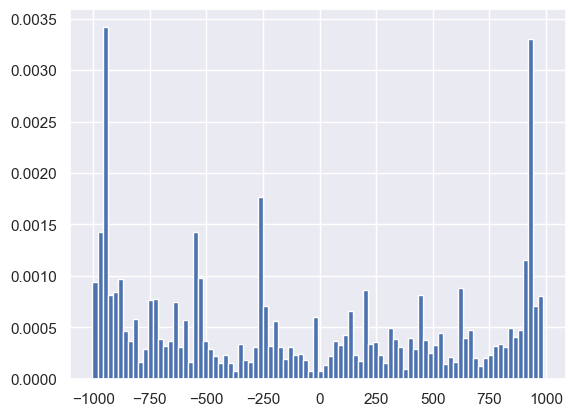

In [161]:
#method1

xFirstchart= currentbranch['x.pos.asec']
yFirstchart= currentbranch['total.counts']

histMethod1x = plt.hist(xFirstchart, bins=90, weights=yFirstchart, density=True)

# Now 'hist' will have y-values based on the 'total.counts' column, and x-values based on the 'x.pos.asec' column.


In [162]:
xsecondChart= currentbranch['y.pos.asec']
ysecondCHart= currentbranch['total.counts']



#end of method1 and task3

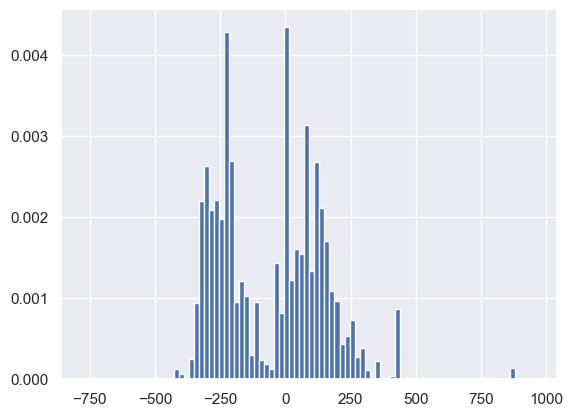

In [163]:
histMethod1y = plt.hist(xsecondChart, bins=90, weights=ysecondCHart, density=True)

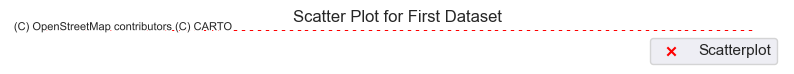

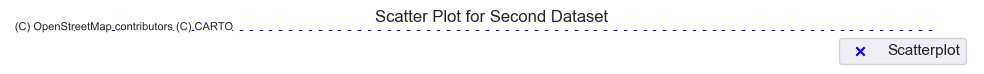

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx

# Assuming xFirstchart, yFirstchart, xsecondChart, ysecondCHart are your data arrays

# Calculate histograms
hist_x, bin_edges_x = np.histogram(xFirstchart, bins=90, weights=yFirstchart, density=True)
hist_y, bin_edges_y = np.histogram(xsecondChart, bins=90, weights=ysecondCHart, density=True)

# Calculate bin centers
bin_centers_x = (bin_edges_x[:-1] + bin_edges_x[1:]) / 2
bin_centers_y = (bin_edges_y[:-1] + bin_edges_y[1:]) / 2

# Create scatter plot for the first dataset
f, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(bin_centers_x, hist_x, c='red', marker='x', label='Scatterplot')

# Add contextily basemap
ax1.set_axis_off()
ctx.add_basemap(ax=ax1, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)
plt.legend()
plt.title('Scatter Plot for First Dataset')

# Create scatter plot for the second dataset
f, ax2 = plt.subplots(figsize=(10, 8))
plt.scatter(bin_centers_y, hist_y, c='blue', marker='x', label='Scatterplot')

# Add contextily basemap
ax2.set_axis_off()
ctx.add_basemap(ax=ax2, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)
plt.legend()
plt.title('Scatter Plot for Second Dataset')

# Kernel Density Estimation
kde = sns.kdeplot(
    ax=ax,
    x=np.repeat(bin_centers_x, len(bin_centers_y)),  # Repeat x bin centers for each y value
    y=np.tile(bin_centers_y, len(bin_centers_x)),  # Tile y bin centers for each x value
    levels=levels,
    fill=True,
    cmap='Reds',
    alpha=0.9
)

# Show the plots
plt.tight_layout()
plt.show()


AttributeError: 'NoneType' object has no attribute 'to_string'

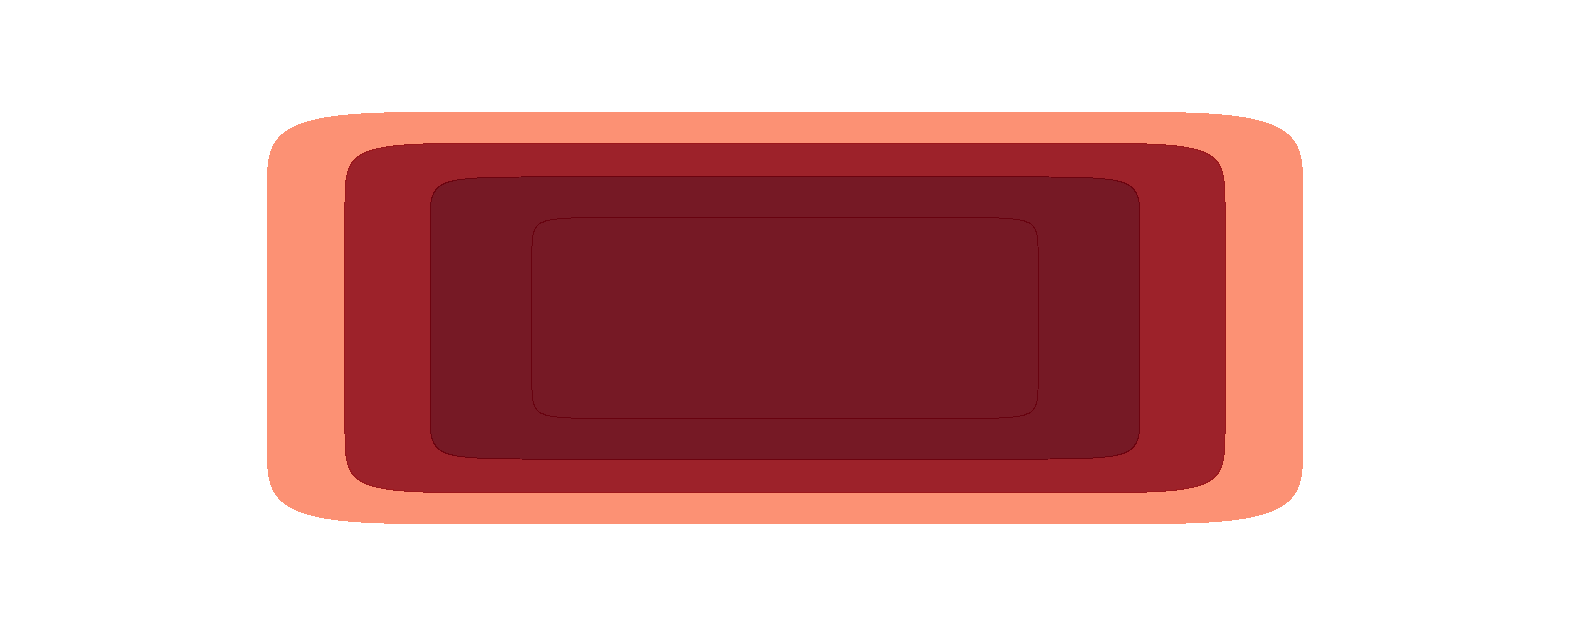

In [165]:

hist_x,bin_edges_x = np.histogram(xFirstchart, bins=90, weights=yFirstchart, density=True)
hist_y, bin_edges_y = np.histogram(xsecondChart, bins=90, weights=ysecondCHart, density=True)

#calculating bin ceneters
bin_centers_x = (bin_edges_x[:-1] + bin_edges_x[1:]) / 2
bin_centers_y = (bin_edges_y[:-1] + bin_edges_y[1:]) / 2

levels = [0.2, 0.4, 0.6, 0.8, 1]

# Create plot
f, ax = plt.subplots(ncols=1, figsize=(20, 8))


# Kernel Density Estimation
kde = sns.kdeplot(
    ax=ax,
    x=np.repeat(bin_centers_x, len(bin_centers_y)),  # Repeat x bin centers for each y value
    y=np.tile(bin_centers_y, len(bin_centers_x)),  # Tile y bin centers for each x value
    levels=levels,
    fill=True,
    cmap='Reds',
    alpha=0.9
)

ax.set_axis_off()
ctx.add_basemap(ax=ax,crs = currentbranch.crs.to_string(), source=ctx.providers.CartoDB.Positron)
plt.tight_layout()

plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/contextily/tile.py:561: RuntimeWarning:

invalid value encountered in subtract

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/contextily/tile.py:566: RuntimeWarning:

divide by zero encountered in scalar divide



ValueError: cannot convert float NaN to integer

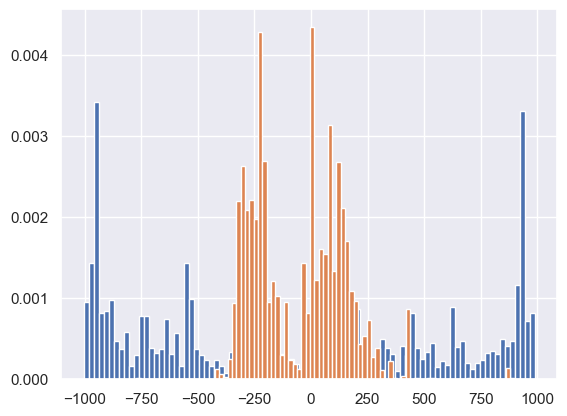

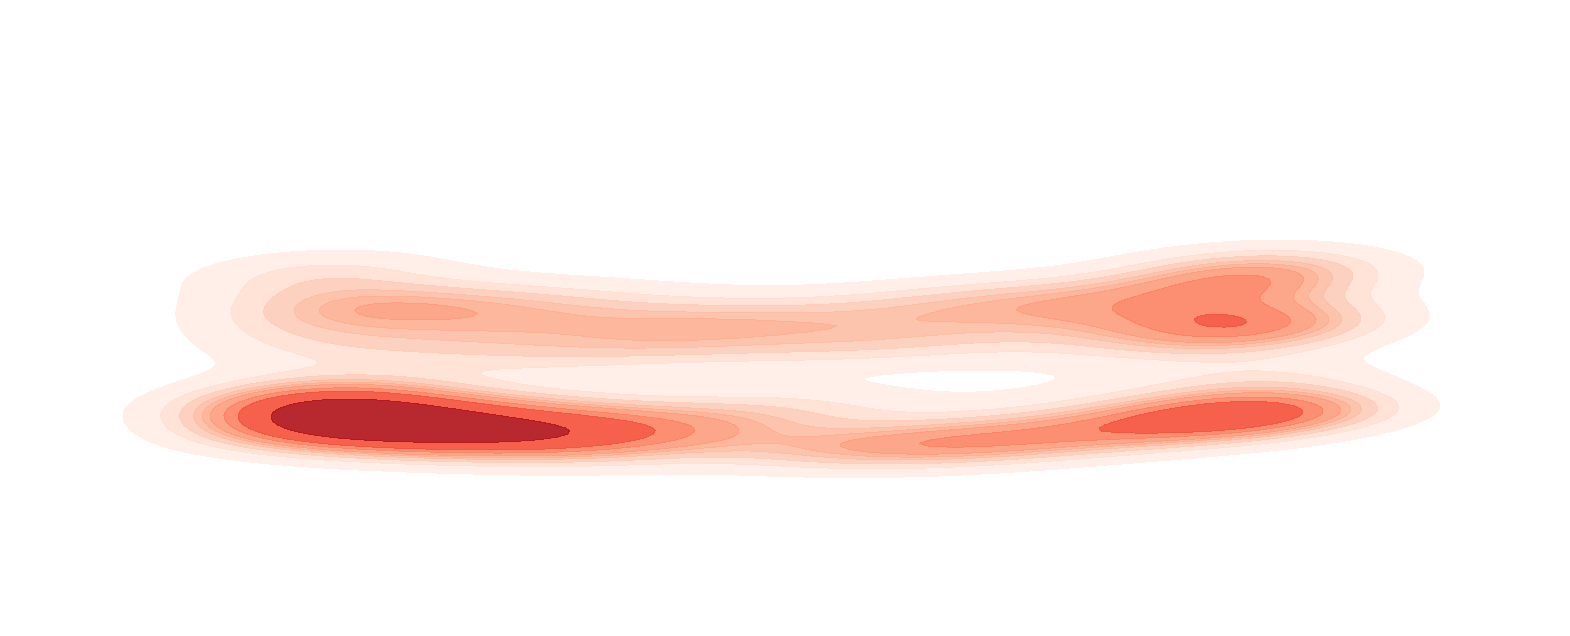

In [166]:
histMethod1x = plt.hist(xFirstchart, bins=90, weights=yFirstchart, density=True)
histMethod1y = plt.hist(xsecondChart, bins=90, weights=ysecondCHart, density=True)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx

# Assuming xFirstchart, yFirstchart, xsecondChart, ysecondCHart are your data arrays

# Calculate histograms
hist_x, bin_edges_x = np.histogram(xFirstchart, bins=90, weights=yFirstchart, density=True)
hist_y, bin_edges_y = np.histogram(xsecondChart, bins=90, weights=ysecondCHart, density=True)

# Calculate bin centers
bin_centers_x = (bin_edges_x[:-1] + bin_edges_x[1:]) / 2
bin_centers_y = (bin_edges_y[:-1] + bin_edges_y[1:]) / 2

# Create a 2D KDE plot
f, ax = plt.subplots(ncols=1, figsize=(20, 8))
kde = sns.kdeplot(
    ax=ax,
    x=xFirstchart,
    y=xsecondChart,
    fill=True,
    cmap='Reds',
    alpha=0.9
)

# Overlay scatterplots on top of the KDE plot
# plt.scatter(bin_centers_x, bin_centers_y, c='black', marker='x', s=50, label='Scatterplot')

# Add contextily basemap
ax.set_axis_off()
ctx.add_basemap(ax=ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/contextily/tile.py:561: RuntimeWarning:

invalid value encountered in subtract

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/contextily/tile.py:566: RuntimeWarning:

divide by zero encountered in scalar divide



ValueError: cannot convert float NaN to integer

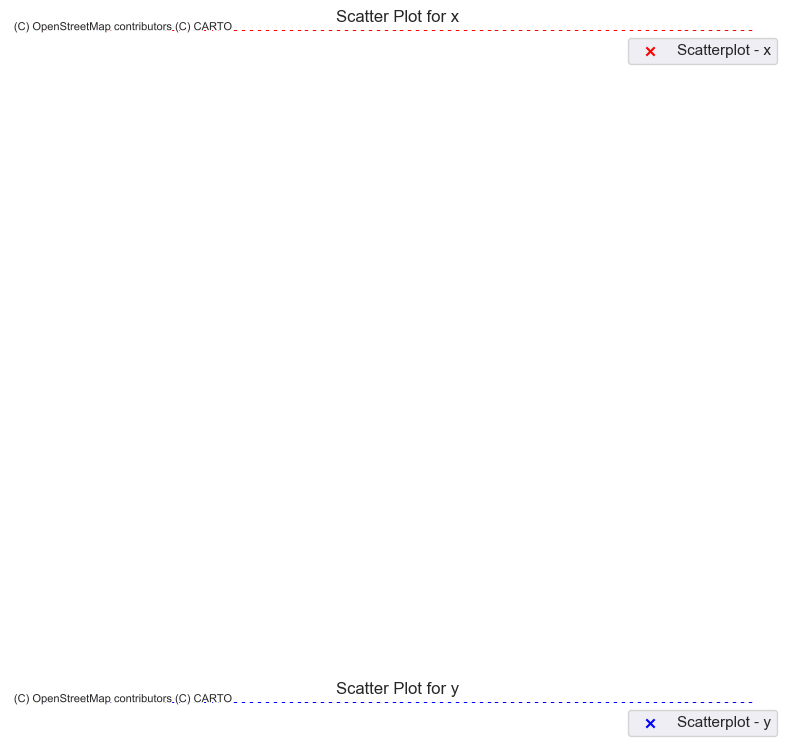

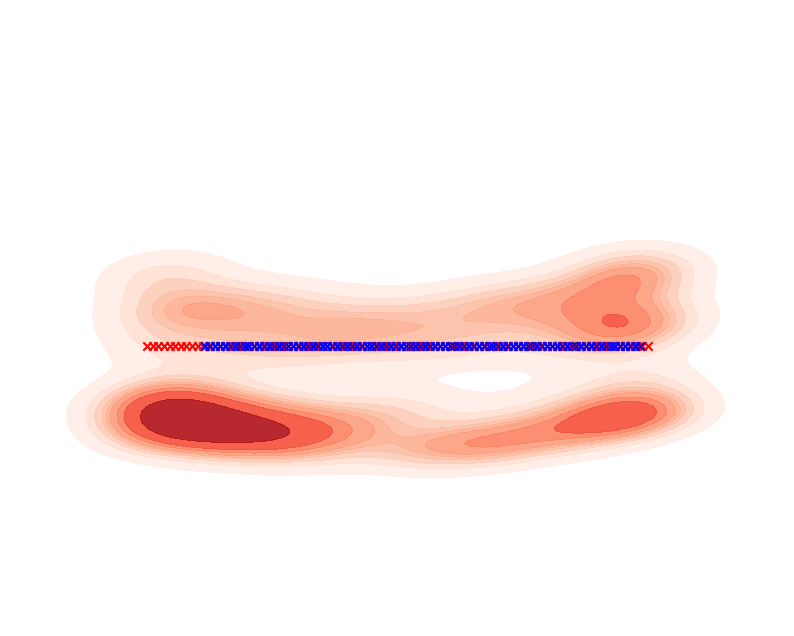

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx

# Assuming xFirstchart, yFirstchart, xsecondChart, ysecondCHart are your data arrays

# Calculate histograms
hist_x, bin_edges_x = np.histogram(xFirstchart, bins=90, weights=yFirstchart, density=True)
hist_y, bin_edges_y = np.histogram(xsecondChart, bins=90, weights=ysecondCHart, density=True)

# Calculate bin centers
bin_centers_x = (bin_edges_x[:-1] + bin_edges_x[1:]) / 2
bin_centers_y = (bin_edges_y[:-1] + bin_edges_y[1:]) / 2

# Create scatter plots for x and y
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 16))

# Scatter plot for x
ax1.scatter(bin_centers_x, hist_x, c='red', marker='x', label='Scatterplot - x')
ax1.set_axis_off()
ctx.add_basemap(ax=ax1, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)
ax1.legend()
ax1.set_title('Scatter Plot for x')

# Scatter plot for y
ax2.scatter(bin_centers_y, hist_y, c='blue', marker='x', label='Scatterplot - y')
ax2.set_axis_off()
ctx.add_basemap(ax=ax2, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)
ax2.legend()
ax2.set_title('Scatter Plot for y')

# Combine scatter plots with Kernel Density Estimation
f, ax_combined = plt.subplots(figsize=(10, 8))
sns.kdeplot(
    ax=ax_combined,
    x=xFirstchart,
    y=xsecondChart,
    fill=True,
    cmap='Reds',
    alpha=0.9
)

# Overlay scatter plots on top of the KDE plot
ax_combined.scatter(bin_centers_x, hist_x, c='red', marker='x', label='Scatterplot - x')
ax_combined.scatter(bin_centers_y, hist_y, c='blue', marker='x', label='Scatterplot - y')

# Add contextily basemap
ax_combined.set_axis_off()
ctx.add_basemap(ax=ax_combined, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)
ax_combined.legend()
ax_combined.set_title('KDE with Scatterplot Overlay')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
import numpy as pd
import matplotlib.pyplot as plt

data1 = np.random.normal(0,1,1000)
data2 = np.random.normal(5,1,1000)

hist1, edges1 = np.histogram(data1, bins=50, density=True)
hist2, edges2 = np.histogram(data2, bins=50, density=True)

x_values1 = (edges1[1:] + edges1[:-1]) /2
y_values1 = hist1

x_values2 = (edges2[1:] + edges2[:-1])/2
y_values2 = hist2

plt.plot(x_values1, y_values1, marker = 'o', linestyle = '-', color = 'blue',label = )



In [ ]:
#method 2
x= currentbranch['x.pos.asec']
y= currentbranch['total.counts']

# Assuming currentbranch is your DataFrame
currentbranch['result'] = currentbranch.apply(lambda row: row['energy.kev'] * row['duration.s'], axis=1)
# display(currentbranch)

# hist = plt.hist(x, bins=90, weights=y, density=True)

# Create a DataFrame (you should have your DataFrame loaded)
data = currentbranch['energy.kev']
df = pd.DataFrame(data)

# Parse the values from the 'column_name' using a hyphen as a separator
df[['start', 'end']] = currentbranch['energy.kev'].str.split('-', expand=True)

# Convert 'start' and 'end' columns to numeric
df['start'] = pd.to_numeric(df['start'])
df['end'] = pd.to_numeric(df['end'])

# Calculate the median for each row and store it in a new column 'result'
currentbranch['median'] = df[['start', 'end']].median(axis=1)
# The 'start' and 'end' columns now contain the parsed values
# display(currentbranch)


currentbranch['result'] = currentbranch["median"]*currentbranch["duration.s"]

display(currentbranch)





In [ ]:
#method 2 for task3
x_2= currentbranch['x.pos.asec']
y_2= currentbranch['result']

hist2 = plt.hist(x_2, bins=90, weights=y_2, density=True)

# Now 'hist' will have y-values based on the 'total.counts' column, and x-values based on the 'x.pos.asec' column.

In [ ]:
#method 2 for task3
x_2= currentbranch['x.pos.asec']
y_2= currentbranch['result']

hist2 = plt.hist(x_2, bins=90, weights=y_2, density=True)

# Now 'hist' will have y-values based on the 'total.counts' column, and x-values based on the 'x.pos.asec' column.

In [ ]:
#method1 for task4
lastbatch = geodataframes[10]
x_lastbatch= lastbatch['x.pos.asec']
y_lastbatch= lastbatch['total.counts']

hist = plt.hist(x_lastbatch, bins=90, weights=y_lastbatch, density=True)


In [ ]:
#method1 for task4
x_l= lastbatch['y.pos.asec']
y_l= lastbatch['total.counts']

hist = plt.hist(x_l, bins=90, weights=y_l, density=True)

In [ ]:
#method2 for task4
x= lastbatch['x.pos.asec']
y= lastbatch['total.counts']

# Assuming currentbranch is your DataFrame
lastbatch['result'] = lastbatch.apply(lambda row: row['energy.kev'] * row['duration.s'], axis=1)
# display(currentbranch)

# hist = plt.hist(x, bins=90, weights=y, density=True)

# Create a DataFrame (you should have your DataFrame loaded)
data = lastbatch['energy.kev']
df = pd.DataFrame(data)

# Parse the values from the 'column_name' using a hyphen as a separator
df[['start', 'end']] = lastbatch['energy.kev'].str.split('-', expand=True)

# Convert 'start' and 'end' columns to numeric
df['start'] = pd.to_numeric(df['start'])
df['end'] = pd.to_numeric(df['end'])

# Calculate the median for each row and store it in a new column 'result'
lastbatch['median'] = df[['start', 'end']].median(axis=1)
# The 'start' and 'end' columns now contain the parsed values
# display(currentbranch)


lastbatch['result'] = lastbatch["median"]*lastbatch["duration.s"]

display(lastbatch)



In [ ]:
#method 2 for task4 lastbatch
x_2= lastbatch['x.pos.asec']
y_2= lastbatch['result']

hist2 = plt.hist(x_2, bins=90, weights=y_2, density=True)


In [ ]:
#method 2 for task4 lastbatch
x_l= lastbatch['y.pos.asec']
y_l= lastbatch['result']

hist = plt.hist(x_l, bins=90, weights=y_l, density=True)

In [ ]:
import matplotlib.pyplot as plt




# Generate points based on the given data
points = [(x, y) for x, y in zip(currentbranch['x.pos.asec'], currentbranch['y.pos.asec'])]
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)

# Plot the points with size based on total count
for point, count in zip(points, currentbranch['total.counts']):
    plt.scatter(*point, s=count, label=f'Total Count: {count}')

# Add labels and legend
plt.xlabel('X Position (asec)')
plt.ylabel('Y Position (asec)')
plt.title('Points Based on X and Y Positions with Total Count')
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Convert histogram data to polar coordinates
theta = np.deg2rad(np.linspace(0, 360, len(hist[0])))
r = hist[0]

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(4, 4))

# Plot the histogram on the polar plot
bars = ax.bar(theta, r, color='lightblue', alpha=0.7)

# Optionally, you can add scatter points for your landing hotspots
sns.scatterplot(x=lastbatch['x.pos.asec'], y= lastbatch['y.pos.asec'], data=lastbatch['result'], color='lightgreen', s=10, ax=ax)

# Set plot title
ax.set_title('Parachute Landing Hotspot Map on a Circular Histogram')

plt.show()

In [ ]:
# Create thresholds
levels = [0.2,0.4,0.6,0.8,1]

# Create plot
f, ax = plt.subplots(ncols=1, figsize=(20, 8))
# Kernel Density Estimation
kde = sns.kdeplot(
    ax=ax,
    x= currentbranch['x.pos.asec'],
    y= currentbranch['y.pos.asec'],
    levels = levels,
    shade=True,
    cmap='Reds',
    alpha=0.9
)
# Add a basemap
ctx.add_basemap(ax=ax,crs = currentbranch)
ax.set_axis_off()
plt.tight_layout()

plt.show()

In [ ]:
averageoftotal_Count = currentbranch['total.counts'].mean()
print(averageoftotal_Count)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx

# Assuming 'currentbranch' is your DataFrame

# Method 1 - Histogram
x_hist = currentbranch['x.pos.asec']
y_hist = currentbranch['total.counts']

# Create histogram
hist = plt.hist(x_hist, bins=90, weights=y_hist, density=True)

# Define intensity threshold for small hotspots (d1)
d1_threshold = 0.4  # You should adjust this based on your data characteristics

# Identify small hotspots based on the histogram
small_hotspots_x = x_hist[hist[0] > d1_threshold]
small_hotspots_y = y_hist[hist[0] > d1_threshold]

# Method 2 - KDE Plot
x_kde = currentbranch['x.pos.asec']
y_kde = currentbranch['y.asec.pos']

# Create KDE plot
levels = [0.2, 0.4, 0.6, 0.8, 1]
f, ax = plt.subplots(ncols=1, figsize=(20, 8))
kde = sns.kdeplot(
    ax=ax,
    x=x_kde,
    y=y_kde,
    levels=levels,
    shade=True,
    cmap='Reds',
    alpha=0.9
)

# Add a basemap
ctx.add_basemap(ax=ax, crs=currentbranch.crs)

# Define intensity threshold for large hotspots (d2)
d2_threshold = 0.6  # You should adjust this based on your data characteristics

# Identify large hotspots based on the KDE plot
large_hotspots_x = x_kde[y_kde > d2_threshold]
large_hotspots_y = y_kde[y_kde > d2_threshold]

# Plot identified hotspots
plt.scatter(small_hotspots_x, small_hotspots_y, color='blue', label='Small Hotspots')
plt.scatter(large_hotspots_x, large_hotspots_y, color='red', label='Large Hotspots')
plt.legend()

# Display the plots
plt.show()
